In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Exploration

In [2]:
#Get Generation Data
gen = pd.read_csv('https://raw.githubusercontent.com/TawanTan/Super-AI-Homework/master/Week%202/Solar%20Power%20Generation%20Data/Plant_1_Generation_Data.csv')

In [3]:
gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
gen.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
41523,05-06-2020 00:30,4135001,zVJPv84UY57bAof,0.0,0.000000,0.000000,7271273.000
10428,20-05-2020 03:30,4135001,wCURE6d3bPkepu2,0.0,0.000000,0.000000,6815349.000
22801,26-05-2020 17:00,4135001,VHMLBKoKgIrUVDU,4231.0,415.014286,7982.285714,7297507.286
29408,30-05-2020 05:45,4135001,ZnxXDlPa8U1GXgE,0.0,0.000000,0.000000,6636066.000
25810,28-05-2020 04:15,4135001,iCRJl6heRkivqQ3,0.0,0.000000,0.000000,7274692.000


In [5]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
gen.nunique()

DATE_TIME       3158
PLANT_ID           1
SOURCE_KEY        22
DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64

In [7]:
#Drop 'PLANT_ID' and Convert 'DATE_TIME' to datetime
gen.drop('PLANT_ID', axis=1, inplace=True)
gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'])

In [8]:
#Get Weather Sensor Data
wea = pd.read_csv('https://raw.githubusercontent.com/TawanTan/Super-AI-Homework/master/Week%202/Solar%20Power%20Generation%20Data/Plant_1_Weather_Sensor_Data.csv')

In [9]:
wea.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [10]:
wea.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3014,2020-06-16 06:00:00,4135001,HmiyD2TTLFNqkNe,22.494378,21.690323,0.003852
3038,2020-06-16 12:00:00,4135001,HmiyD2TTLFNqkNe,27.874310,38.484759,0.222246
2335,2020-06-09 04:15:00,4135001,HmiyD2TTLFNqkNe,21.271885,19.703494,0.000000
1946,2020-06-05 03:00:00,4135001,HmiyD2TTLFNqkNe,21.960252,19.703837,0.000000
1979,2020-06-05 11:15:00,4135001,HmiyD2TTLFNqkNe,28.108830,54.984794,0.913814


In [11]:
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [12]:
wea.nunique()

DATE_TIME              3182
PLANT_ID                  1
SOURCE_KEY                1
AMBIENT_TEMPERATURE    3182
MODULE_TEMPERATURE     3182
IRRADIATION            1758
dtype: int64

In [13]:
#Drop 'PLANT_ID' and Convert 'DATE_TIME' to datetime
wea.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1, inplace=True)
wea["DATE_TIME"] = pd.to_datetime(wea["DATE_TIME"])

In [14]:
#Merge 2 DataFrames
df = pd.merge(gen, wea, on='DATE_TIME', how='inner')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  object        
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.5+ MB


In [36]:
df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,45680.000000,45680.000000,45680.000000,4.568000e+04,45680.000000,45680.000000,45680.000000
mean,3197.175971,312.652679,3313.146538,6.957007e+06,25.917168,31.877975,0.236834
std,4080.448523,398.668968,3156.100252,4.172386e+05,3.556550,12.638448,0.306316
min,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,0.000000,0.000000,0.000000,6.512358e+06,22.930031,21.406390,0.000000
50%,464.196429,44.912500,2653.633928,7.115711e+06,24.993020,25.379072,0.035266
75%,6478.424107,634.481250,6318.000000,7.244521e+06,28.379008,42.757119,0.459503
max,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652


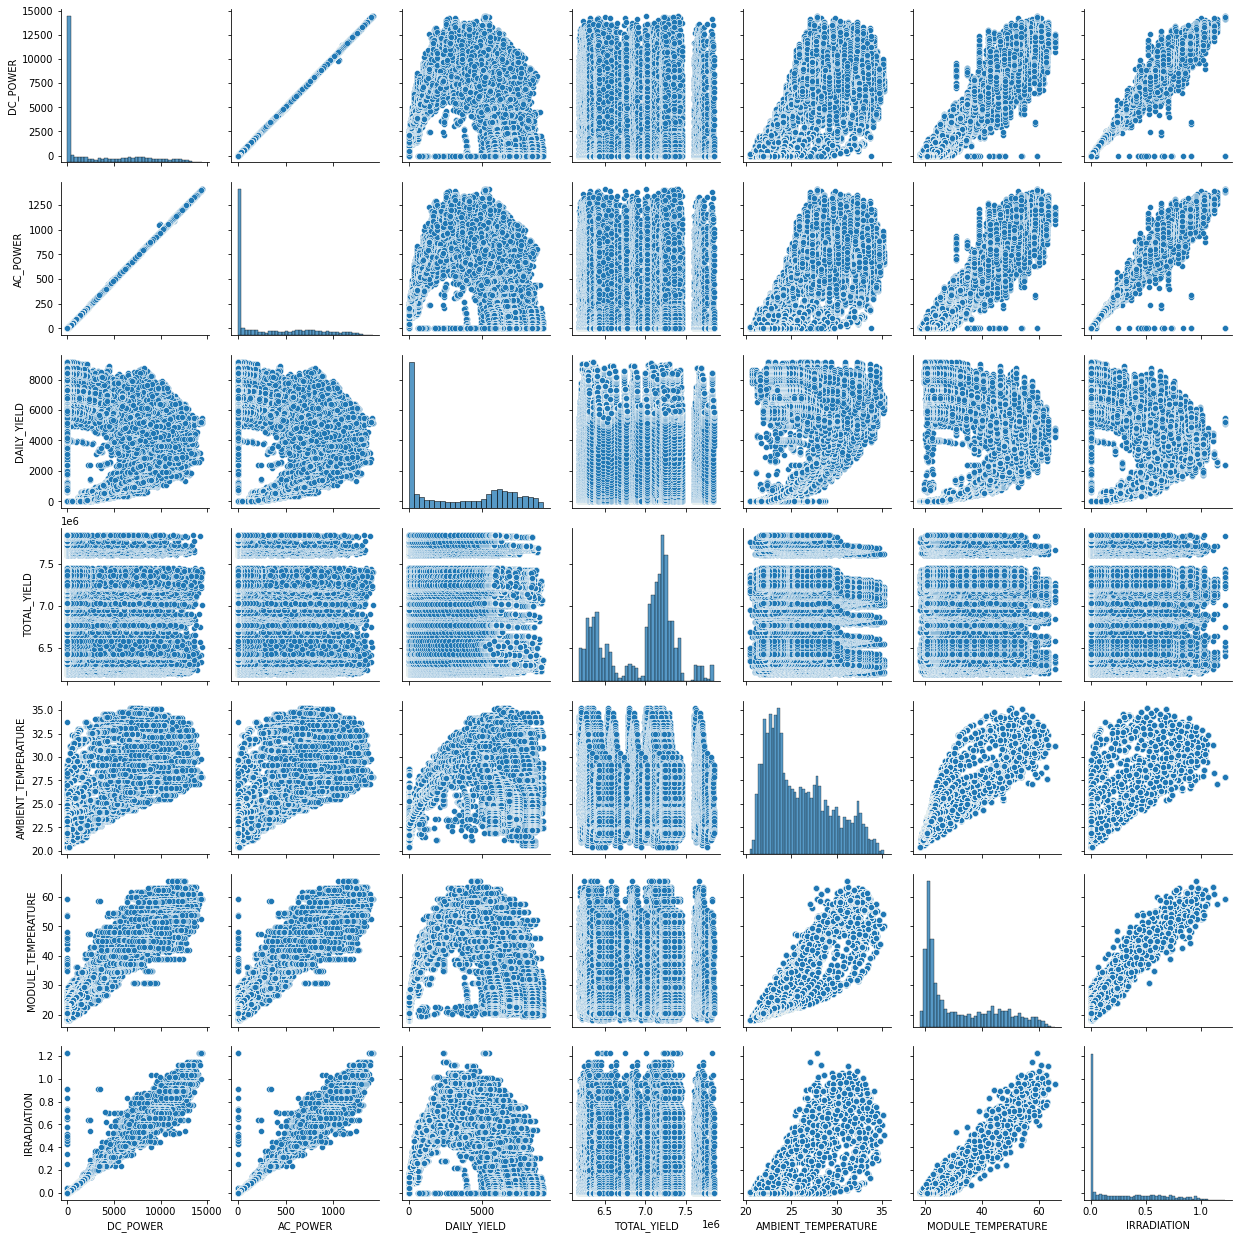

In [44]:
sns.pairplot(df);

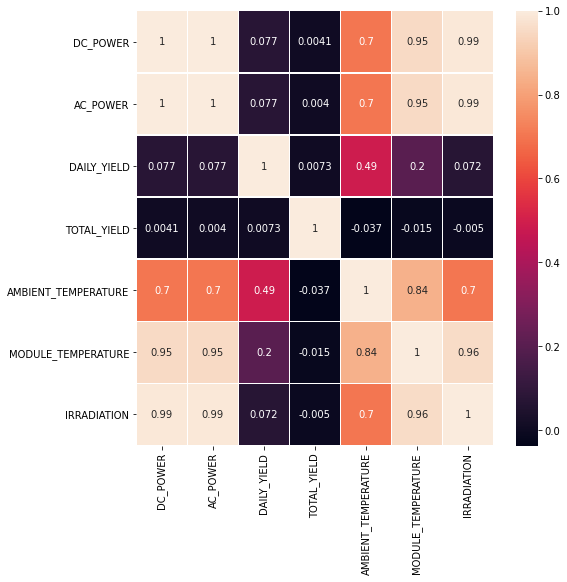

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='white');

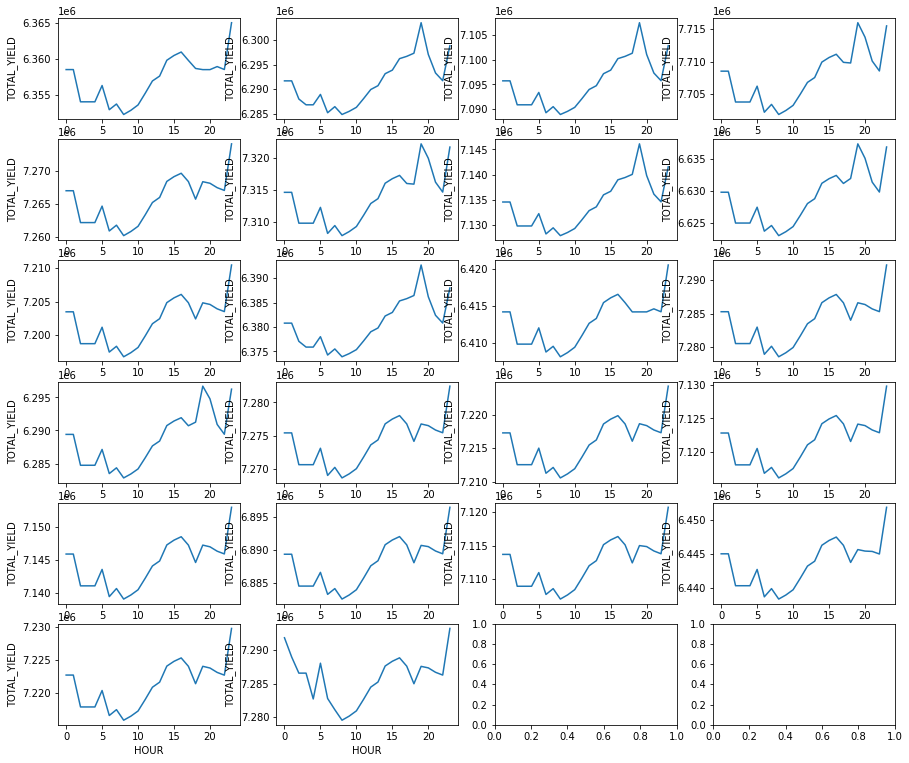

In [84]:
dfx = df.copy()
dfx['HOUR'] = [dfx['DATE_TIME'][i].hour for i in dfx.index]
dfx['MINUTE'] = [dfx['DATE_TIME'][i].minute for i in dfx.index]
keys = dfx['SOURCE_KEY'].unique()
f, axes = plt.subplots(6, 4, figsize=(15, 13))
axes=axes.ravel()
for i,key in enumerate(keys):
  dfx2 = dfx[dfx['SOURCE_KEY'] == key]
  dfx3 = dfx2.groupby('HOUR').mean()
  plot = sns.lineplot(x=dfx3.index, y=dfx3['TOTAL_YIELD'], ax=axes[i]);

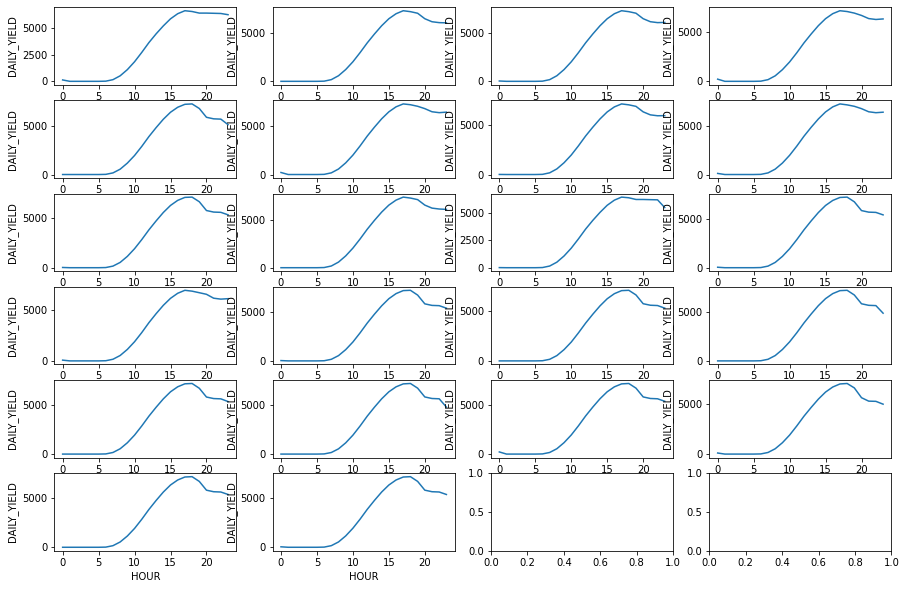

In [85]:
f, axes = plt.subplots(6, 4, figsize=(15, 10))
axes=axes.ravel()
for i,key in enumerate(keys):
  dfx2 = dfx[dfx['SOURCE_KEY'] == key]
  dfx3 = dfx2.groupby('HOUR').mean()
  plot = sns.lineplot(x=dfx3.index, y=dfx3['DAILY_YIELD'], ax=axes[i]);

# Data Preparation

In [18]:
import datetime

In [19]:
def extract_features(data, days):
  data_f = data.copy()
  data_f['HOUR'] = [data_f['DATE_TIME'][i].hour for i in data_f.index]      #Create 'HOUR' Featur
  data_f['MINUTE'] = [data_f['DATE_TIME'][i].minute for i in data_f.index]  #Create 'MINUTE' Featur
  date = data_f['DATE_TIME']
  cols = data_f.drop(['DATE_TIME', 'SOURCE_KEY', 'HOUR', 'MINUTE'], axis=1).columns
  df2 = data_f.copy()
  for i in range(1, days+1):
    for j in cols:
      bw = df2[['DATE_TIME', 'SOURCE_KEY', j]].copy()
      bw['DATE_TIME'] = date + datetime.timedelta(days=i)
      df2 = pd.merge(df2 ,bw , on=['DATE_TIME', 'SOURCE_KEY'], how='left', suffixes=('', f'_{i}D'))
  #print(df2.isnull().sum()) 
  df3 = df2.fillna(0)
  df_dummied = pd.get_dummies(df3, drop_first=True)   #Get dummies 
  return df_dummied

In [20]:
df_3d = extract_features(df, 3)

# K-Fold

In [27]:
#Set Y = 'DIALY_YIELD'
def k_fold(data, k):
  X = []
  y = []
  for i in range(10):
      xf = []
      yf = []
      for j in np.array(data.loc[range(i,len(data),10)]):
          xf.append(np.append(j[1:3],j[4:]))
          #print(data.columns[3])
          yf.append(j[3])
      X.append(xf)
      y.append(yf)
  X = np.array(X)
  y = np.array(y)
  #print('X:', X.shape)
  #print('y:', y.shape)
  return X, y

In [28]:
X_3d, y_3d = k_fold(df_3d, 10)

# Modelling and Evaluation

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn import metrics
import time
lr = LinearRegression()
xgb = xgb.XGBRegressor(n_estimators=50,
                       objective ='reg:squarederror',
                       learning_rate = 0.16,
                       colsample_bytree=0.6,
                       max_depth = 4,
                       min_child_weight = 6)
rf = RandomForestRegressor()
svr = SVR()

In [30]:
 def modelling(X, y, model):
  times = []
  MAE = []
  MSE = []
  RMSE = []
  R2 = []
  for i in range(len(X)):
    X_train = []
    y_train = []
    start = time.time()
    for k, f in enumerate(X):
      if k == i:
        continue
      for j in f:
        X_train.append(j)
    for a, b in enumerate(y):
      if a == i:
        continue
      for c in b:
        y_train.append(c)
    X_train = np.array(X_train)
    y_test = np.array(y[i])
    model.fit(X_train,y_train)
    end = time.time()
    times.append(end - start)
    pred = model.predict(X[i])
    mae = metrics.mean_absolute_error(y_test, pred)
    MAE.append(mae)
    mse = metrics.mean_squared_error(y_test, pred)
    MSE.append(mse) 
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
    RMSE.append(rmse)
    r2 = metrics.r2_score(y_test, pred)
    R2.append(r2)
    #print(f'Fold #{i+1}***********************')
    #print('Mean Absolute Error (MAE):', mae)
    #print('Mean Squared Error (MSE):', mse)
    #print('Root Mean Squared Error (RMSE):', rmse)
    #print('R2:', r2)
    #print('Time: ',end - start)
    #print('')    
  #print('\n\n')
  #print('*********AVG*********')
  #print('MAE:', np.mean(MAE))
  #print('MSE:', np.mean(MSE))
  #print('RMSE:', np.mean(RMSE))
  #print('R2:', np.mean(R2))
  #print('Time:', np.mean(times))
  #print('***********************')
  #print('\n\n')
  return np.mean(MAE), np.mean(MSE), np.mean(RMSE), np.mean(R2), np.mean(times)


In [31]:
#modelling(X_3d, y_3d, lr)

In [35]:
 def run_models(X, y, models_lst):
  mae_lst = []
  mse_lst = []
  rmse_lst = []
  r2_lst = []
  time_lst = []
  for i in models_lst:
    MAE, MSE, RMSE, R2, Time = modelling(X, y, i)
    mae_lst.append(MAE)
    mse_lst.append(MSE)
    rmse_lst.append(RMSE)
    r2_lst.append(R2)
    time_lst.append(Time)
  comp = {'MAE':mae_lst, 'MSE':mse_lst, 'RMSE':rmse_lst, 'R2':r2_lst, 'Time':time_lst}
  comp_table = pd.DataFrame(comp, index=['LR', 'RF', 'XGB', 'SVR'])
  return comp_table

In [87]:
models = [lr, rf, xgb]

In [78]:
print('********Evaluate for 3 DAY********')
run_models(X_3d, y_3d, models)

********Evaluate for 3 DAY********


,MAE,MSE,RMSE,R2,Time
LR,878.040682,2.126186e+06,1458.018521,0.786570,0.209926
RF,791.466906,2.069988e+06,1438.609863,0.792213,9.516190
XGB,405.308662,6.323091e+05,794.718426,0.936542,2.641448


In [79]:
df_7d = extract_features(df, 7)
X_7d, y_7d = k_fold(df_7d, 10)
print('********Evaluate for 7 DAY********')
run_models(X_7d, y_7d, models)

********Evaluate for 7 DAY********


,MAE,MSE,RMSE,R2,Time
LR,858.027670,1.867796e+06,1366.602951,0.812500,0.360097
RF,791.466906,2.069988e+06,1438.609863,0.792213,15.427371
XGB,328.799261,4.259212e+05,651.421409,0.957271,3.833353
